In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['length'] = df['review'].apply(len)

In [6]:
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


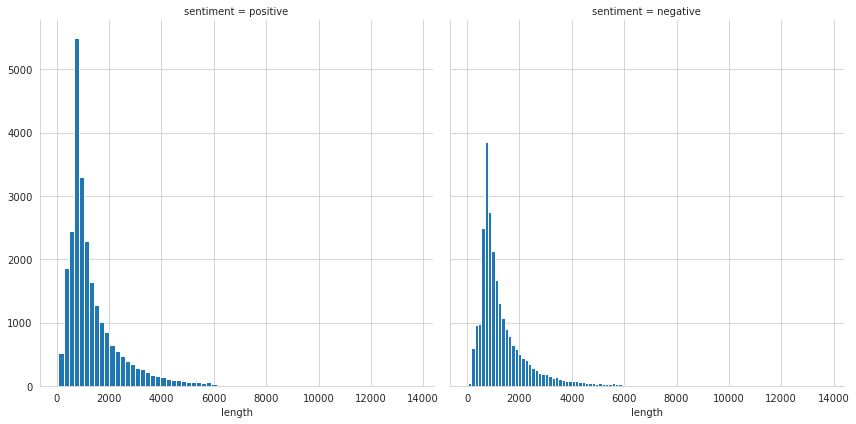

In [7]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='sentiment', size=6)
g.map(plt.hist, 'length', bins=70)


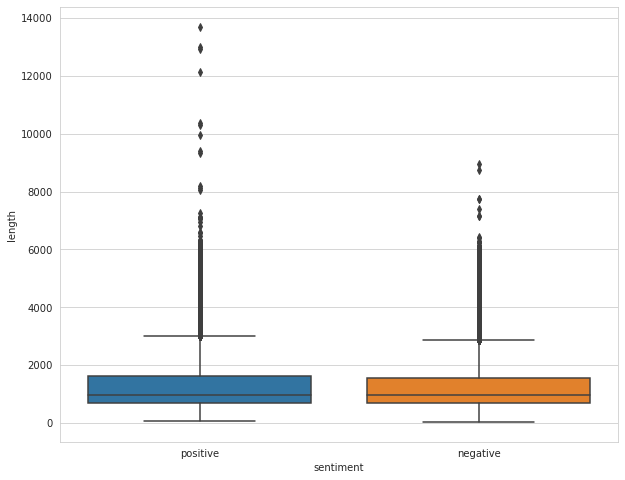

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(x='sentiment', y='length', data=df)

In [9]:
df.describe()

,length
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


In [10]:
df[df['length']==13704]

,review,sentiment,length
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positive,13704


In [11]:
X = df['review']
y = df['sentiment']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
X = cv.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6561  913]
 [1393 6133]]
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      7474
    positive       0.87      0.81      0.84      7526

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

